In [1]:
#%matplotlib inline
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

In [2]:
good_file = "/Users/andreschreiber/Desktop/UAJuniorYear/ECE472/Project/Logs/logFile_GOOD.txt"
bad_file = "/Users/andreschreiber/Desktop/UAJuniorYear/ECE472/Project/Logs/logFile_BAD.txt"
data_baseline = pd.read_csv(good_file)
data_errors = pd.read_csv(bad_file)

In [3]:
import math

def get_metrics(df):
    baseline = dict()
    baseline["t"] = np.array(df["t"])
    baseline["ax"] = np.array(df["ax"])
    baseline["ay"] = np.array(df["ay"])
    baseline["az"] = np.array(df["az"])
    baseline["vx"] = np.array(df["vx"])
    baseline["vy"] = np.array(df["vy"])
    baseline["vz"] = np.array(df["vz"])
    baseline["px"] = np.array(df["px"])
    baseline["py"] = np.array(df["py"])
    baseline["pz"] = np.array(df["pz"])
    accel_mags = []
    velocity_mags = []
    for i in range(0, len(baseline["ax"])):
        x = baseline["ax"][i]
        y = baseline["ay"][i]
        z = baseline["az"][i]
        accel_mags.append(math.sqrt(x*x + y*y + z*z))
    for i in range(len(baseline["vx"])):
        x = baseline["vx"][i]
        y = baseline["vy"][i]
        z = baseline["vz"][i]
        velocity_mags.append(math.sqrt(x*x + y*y + z*z))
    baseline["vmag"] = np.array(velocity_mags)
    baseline["amag"] = np.array(accel_mags)
    return baseline

metrics_bl = get_metrics(data_baseline)
metrics_er = get_metrics(data_errors)

In [4]:
#plt.plot(metrics_bl["t"][50:], metrics_bl["vmag"][50:], 'ro')
#plt.show()
#plt.plot(metrics_er["t"][50:], metrics_er["vmag"][50:], 'ro')
#plt.show()

In [5]:
import matplotlib.animation
from IPython.display import HTML

def is_above_max_threshold(val):
    threshold = np.max(metrics_bl["vmag"][50:])
    if val > threshold:
        return True
    return False

def is_above_avg_threshold(val):
    threshold = np.average(metrics_bl["vmag"][50:])
    if val > threshold:
        return True
    return False

t1 = metrics_er["t"][50:]
x1 = metrics_er["vmag"][50:]
t2 = metrics_bl["t"][50:]
x2 = metrics_bl["vmag"][50:]

def animate1(i):
    l1.set_data(t1[:i], x1[:i])
    if is_above_max_threshold(x1[i]):
        l1.set_color('red')
    elif is_above_avg_threshold(x1[i]):
        l1.set_color('blue')
    else:
        l1.set_color('blue')


def animate2(i):
    l2.set_data(t2[:i], x2[:i])
    if is_above_max_threshold(x2[i]):
        l2.set_color('red')
    elif is_above_avg_threshold(x2[i]):
        l2.set_color('blue')
    else:
        l2.set_color('blue')



<IPython.core.display.Javascript object>


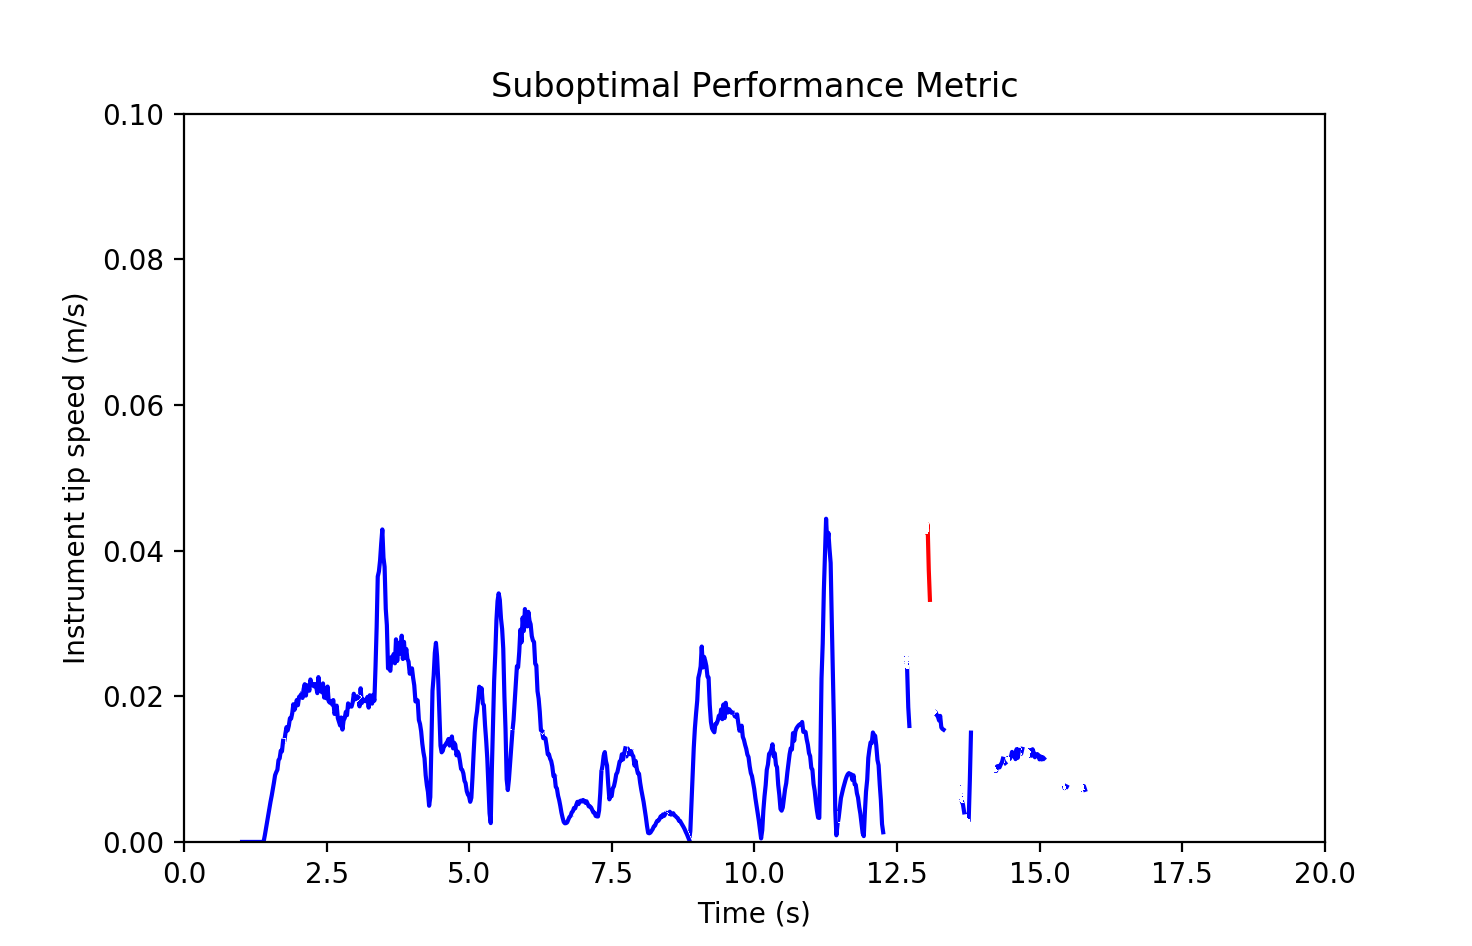

In [6]:
fig1, ax1 = plt.subplots()
ax1.axis([0,20, 0, 0.1])
l1, = ax1.plot([],[])
plt.xlabel("Time (s)")
plt.ylabel("Instrument tip speed (m/s)")
plt.title("Suboptimal Performance Metric")

ani1 = matplotlib.animation.FuncAnimation(fig1, animate1, frames=len(t1), interval=int(max(t1)/len(t1) * 1000))
plt.show()
#HTML(ani1.to_jshtml())

<IPython.core.display.Javascript object>


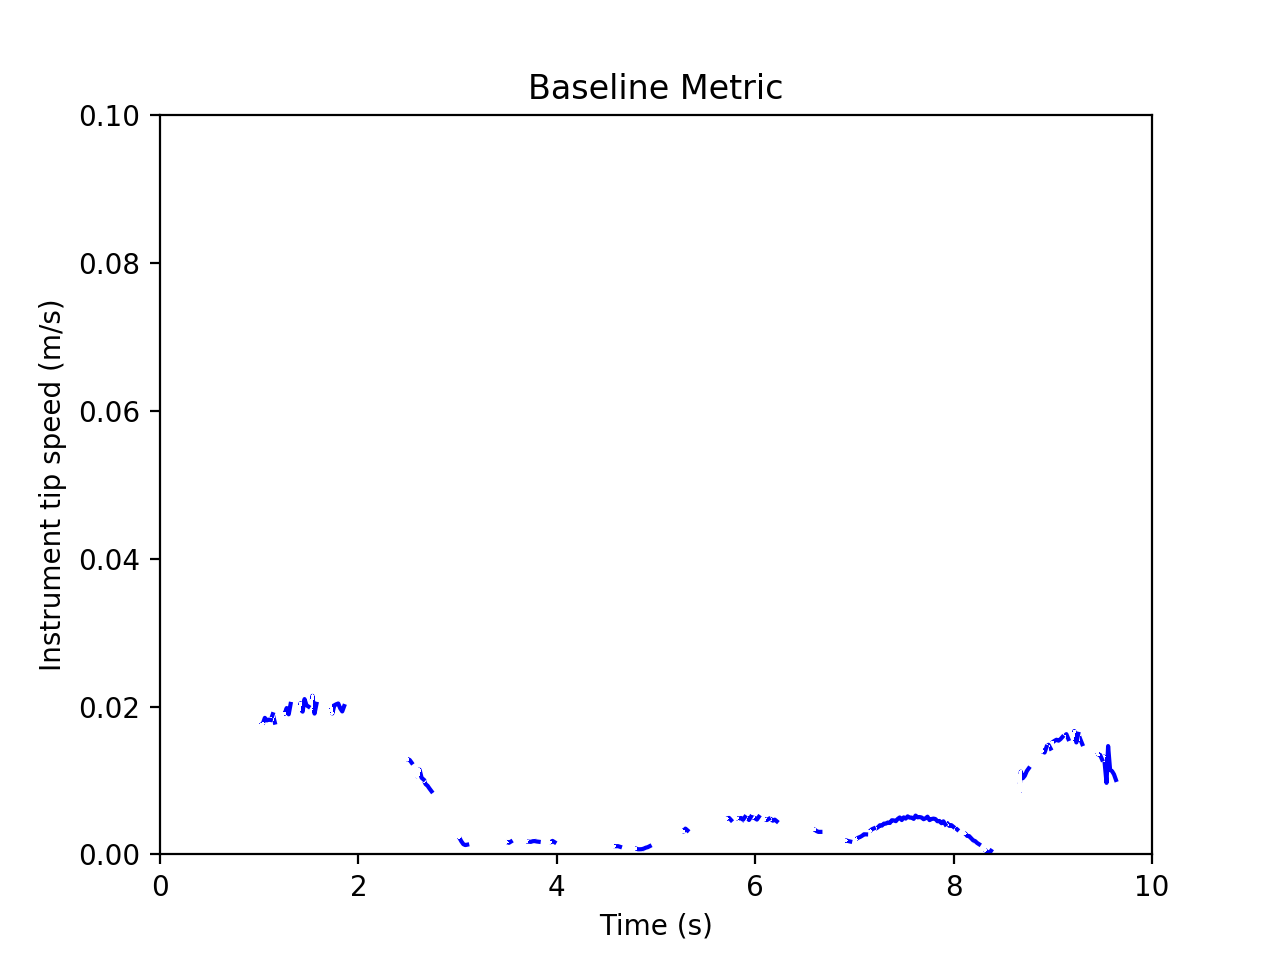

In [7]:
fig2, ax2 = plt.subplots()
ax2.axis([0,10, 0, 0.1])
l2, = ax2.plot([],[])
plt.xlabel("Time (s)")
plt.ylabel("Instrument tip speed (m/s)")
plt.title("Baseline Metric")

ani2 = matplotlib.animation.FuncAnimation(fig2, animate2, frames=len(t2), interval=int(max(t2)/len(t2) * 1000))
plt.show()
#HTML(ani2.to_jshtml())

In [ ]:
time_baseline = metrics_bl["t"][-1]
time_errors = metrics_er["t"][-1]
error_factor = (time_errors - time_baseline) / (time_baseline)
print("Time percent error relative to baseline: {}\n".format(error_factor * 100))

if error_factor > 0.5:
    print("Performance was very slow.")
elif error_factor > 0.2:
    print("Speed could use improvement")
elif error_factor > -0.1:
    print("Speed results satisfactory relative to baseline")
else:
    print("Sutures conducted too quickly")